<a href="https://colab.research.google.com/github/Nithinan-Srikongphan/python_dataviz2024/blob/main/final_dataviz_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

โหลดข้อมูล Metabolites จำนวน 51 samples จาก https://drive.google.com/drive/folders/18BGc4-dxHwuSB6ep3PmHa688Fiww23CI?usp=sharing
ซี่งประกอบด้วยค่า X ขนาด 51x65536 ซึ่งเป็นค่าความเข้มข้นขององค์ประกอบ และ ppm ขนาด 65536 ซึ่งเป็นค่า Chemical shift
ดังรูป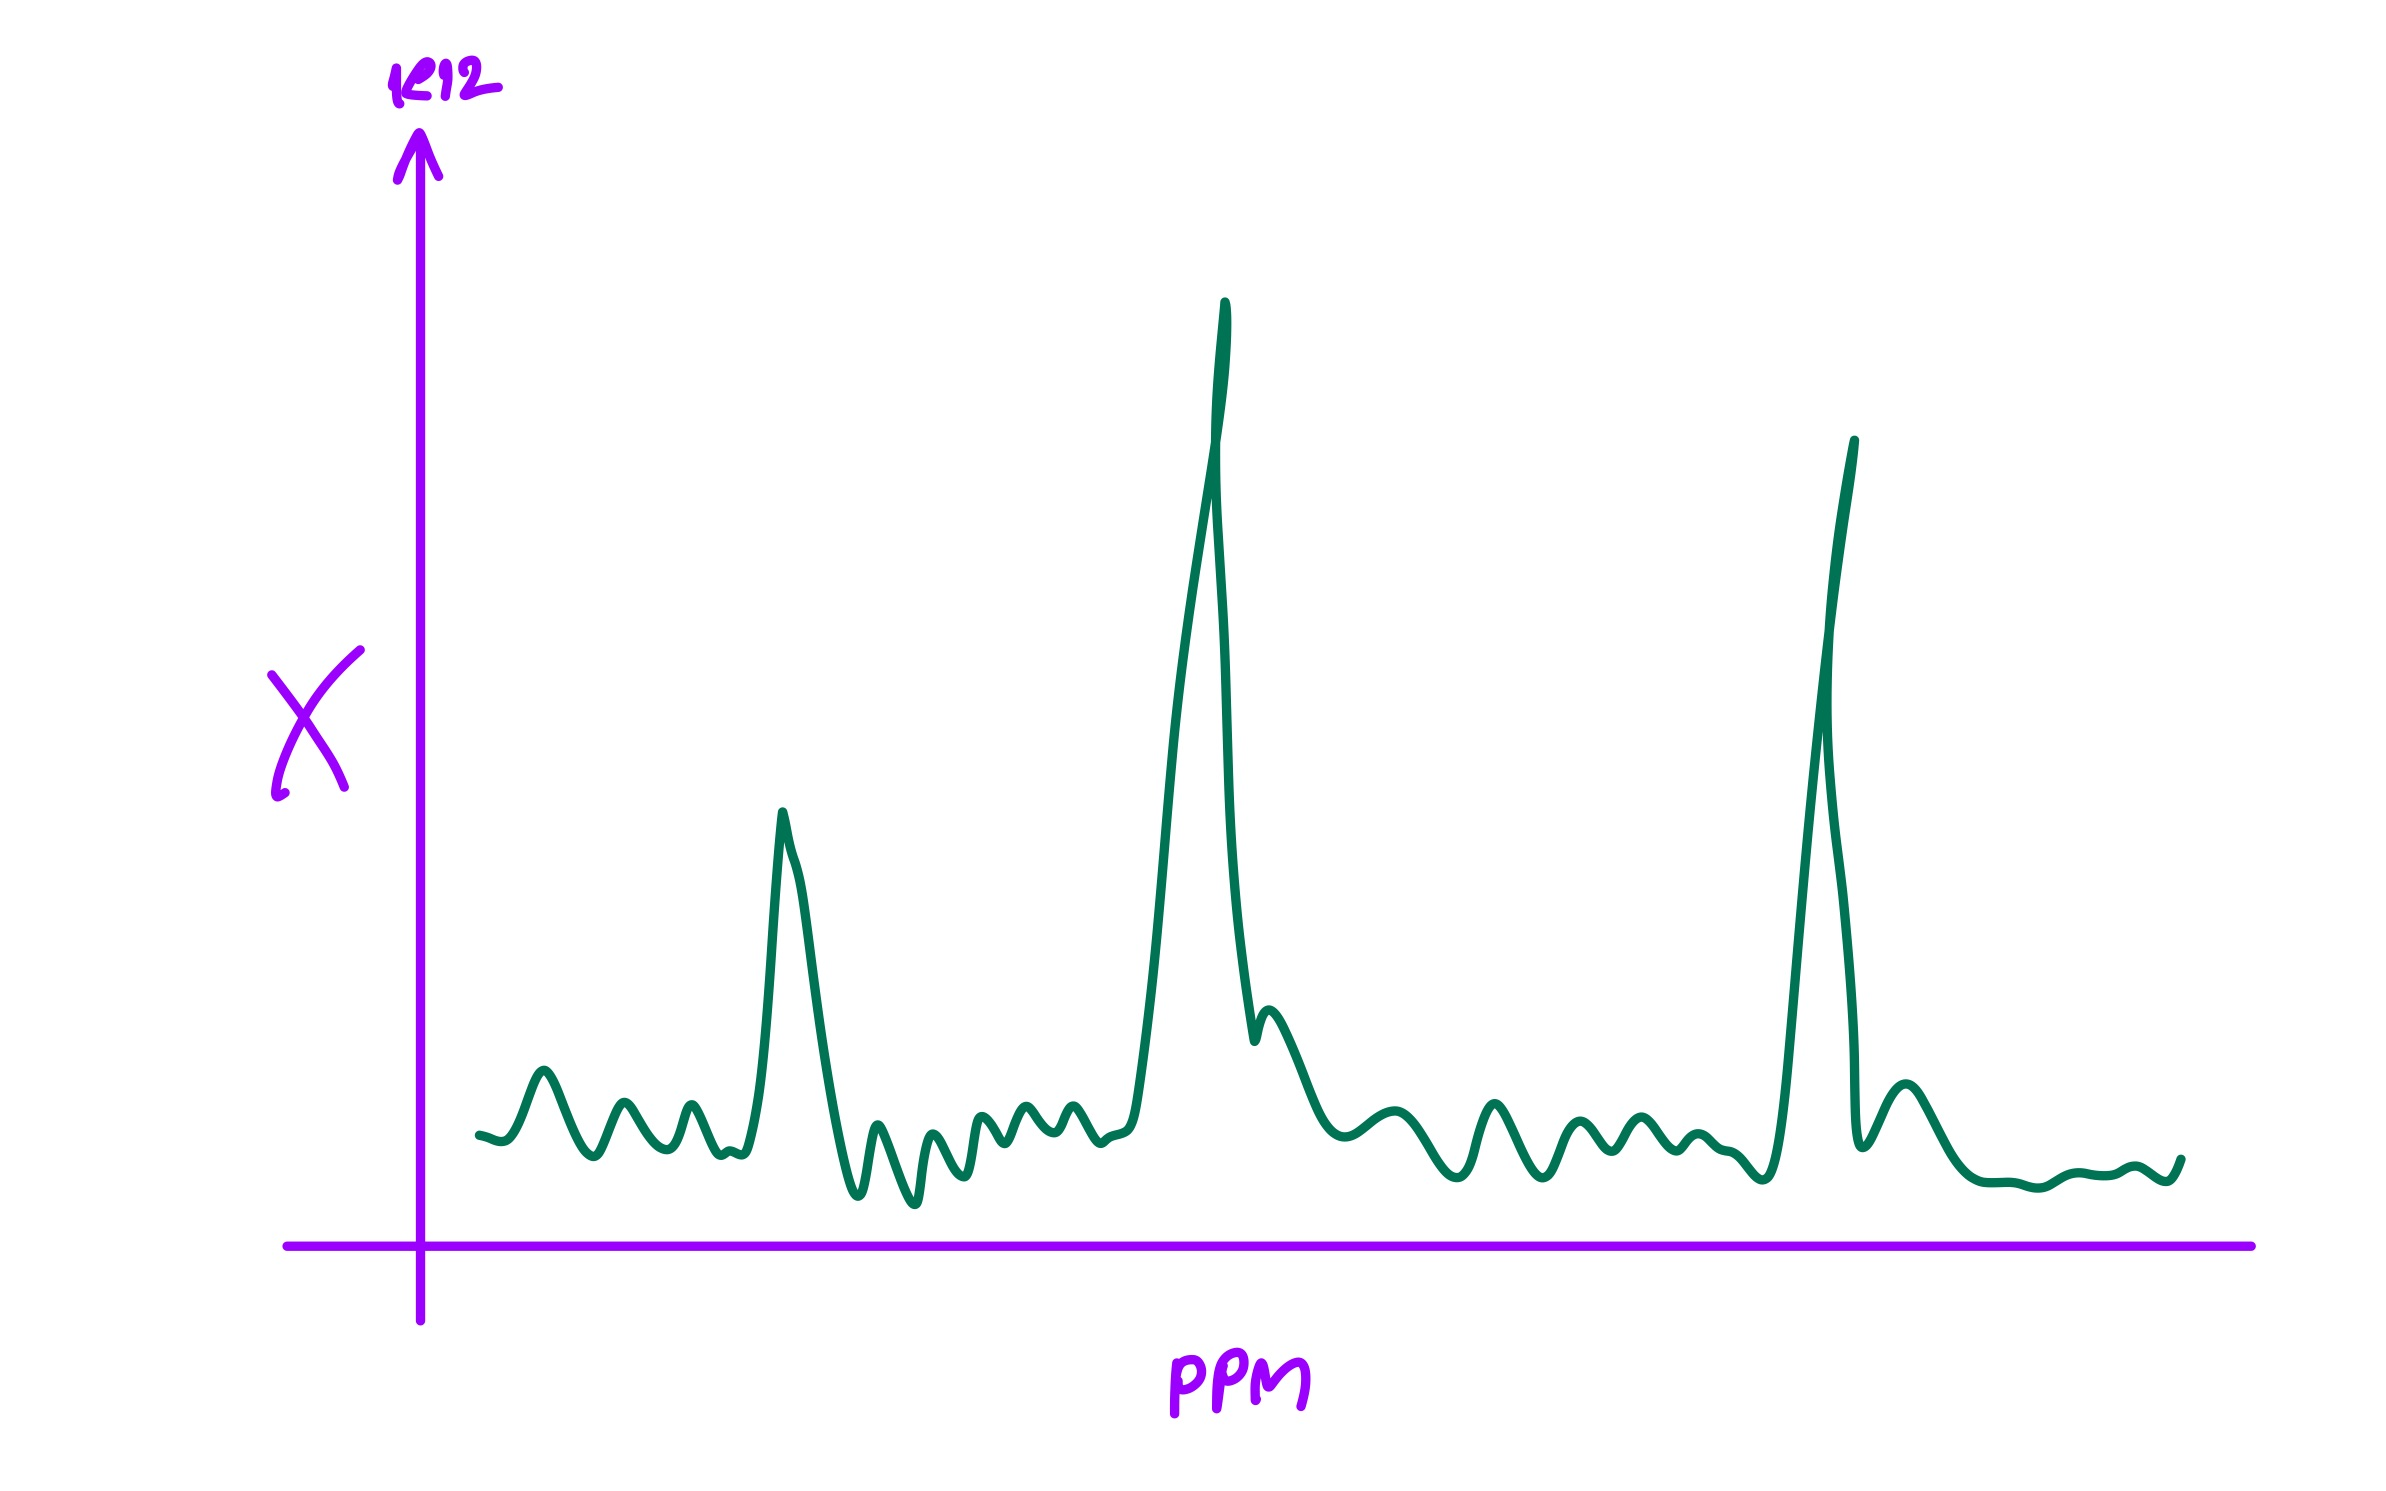

In [1]:
import numpy as np
import pandas as pd
import pickle  # Corrected the module name from 'pickel' to 'pickle'

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# เปิดไฟล์ Pickle จาก Google Drive
with open('/content/drive/My Drive/data_viz_2024_/Final_Exam/Xnn_ppm.pickle', 'rb') as f:
    data = pickle.load(f)

print(data)

(array([[ 1.36984969e+07,  1.36904279e+07,  1.27889682e+07, ...,
         1.88668440e+06,  3.11779437e+06,  3.34950400e+06],
       [ 8.55679993e+06,  7.90758455e+06,  7.28975667e+06, ...,
         1.36576000e+06,  1.36576000e+06,  1.36576000e+06],
       [ 4.74035200e+06,  4.74035200e+06,  4.74035200e+06, ...,
        -2.02200274e+06, -2.32252840e+06, -3.07843664e+06],
       ...,
       [ 3.86329400e+07,  3.86329400e+07,  3.86329400e+07, ...,
        -4.37613458e+08, -4.38095321e+08, -4.40187284e+08],
       [ 9.94168277e+05,  9.94168277e+05,  9.94168277e+05, ...,
        -4.62360904e+05,  4.27633911e+05, -1.72847014e+06],
       [-1.41491086e+05, -1.41491086e+05, -1.41491086e+05, ...,
         1.16130230e+07,  1.16073431e+07,  8.35909427e+06]]), array([10.87128   , 10.87109488, 10.87090976, ..., -1.26026981,
       -1.26045493, -1.26064005]))


In [3]:
# ตรวจสอบโครงสร้างของข้อมูลที่โหลดมา
print(f'Type of data: {type(data)}')
print(f'Length of data tuple: {len(data)}')

Type of data: <class 'tuple'>
Length of data tuple: 2


In [4]:
# ตรวจสอบข้อมูล sample แรก
# ลองแสดงข้อมูลแต่ละส่วนของ tuple เพื่อดูว่ามีอะไรบ้าง
print("ตัวอย่างข้อมูลจาก index 0:")
print(data[0])  # กำหนดว่าตรงนี้คือ X

ตัวอย่างข้อมูลจาก index 0:
[[ 1.36984969e+07  1.36904279e+07  1.27889682e+07 ...  1.88668440e+06
   3.11779437e+06  3.34950400e+06]
 [ 8.55679993e+06  7.90758455e+06  7.28975667e+06 ...  1.36576000e+06
   1.36576000e+06  1.36576000e+06]
 [ 4.74035200e+06  4.74035200e+06  4.74035200e+06 ... -2.02200274e+06
  -2.32252840e+06 -3.07843664e+06]
 ...
 [ 3.86329400e+07  3.86329400e+07  3.86329400e+07 ... -4.37613458e+08
  -4.38095321e+08 -4.40187284e+08]
 [ 9.94168277e+05  9.94168277e+05  9.94168277e+05 ... -4.62360904e+05
   4.27633911e+05 -1.72847014e+06]
 [-1.41491086e+05 -1.41491086e+05 -1.41491086e+05 ...  1.16130230e+07
   1.16073431e+07  8.35909427e+06]]


In [5]:
print("ตัวอย่างข้อมูลจาก index 1:")
print(data[1])  # กำหนดว่าตรงนี้คือ ppm

ตัวอย่างข้อมูลจาก index 1:
[10.87128    10.87109488 10.87090976 ... -1.26026981 -1.26045493
 -1.26064005]


In [6]:
# กำหนดว่า index 0 เป็น X และ index 1 เป็น ppm
X = data[0]  # ค่า X ขนาด 51x65536
ppm = data[1]  # ค่า Chemical shift ขนาด 65536

# แสดงข้อมูลขนาดของ X และ ppm
print(f'ขนาดของ X: {X.shape}')
print(f'ขนาดของ ppm: {len(ppm)}')

ขนาดของ X: (51, 65536)
ขนาดของ ppm: 65536


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


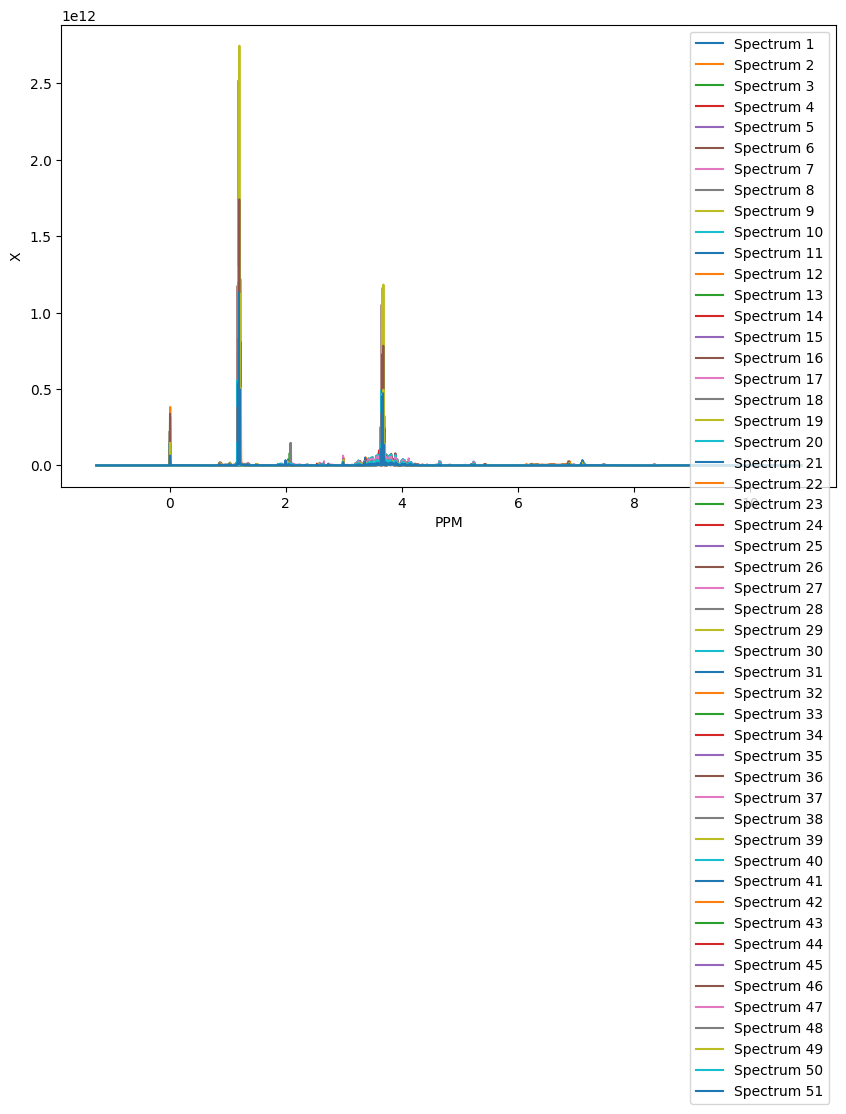

In [7]:
# prompt: แสดงเป็นกราฟแกน x คือ PPM แกน y คือ X เพื่อแสดง legend

import matplotlib.pyplot as plt

# สร้างกราฟ
plt.figure(figsize=(10, 6))  # กำหนดขนาดของกราฟ

# วนลูปเพื่อพล็อตกราฟสำหรับแต่ละสเปกตรัม
for i in range(X.shape[0]):
  plt.plot(ppm, X[i, :], label=f'Spectrum {i+1}')  # พล็อตกราฟและกำหนด label

# กำหนดชื่อแกน x และ y
plt.xlabel('PPM')
plt.ylabel('X')

# แสดง legend
plt.legend()

# แสดงกราฟ
plt.show()

จัดการข้อมูลโดย 1 ตัด ข้อมูลที่อยู่นอกช่วงที่สนใจ (ppm $\leq$ 0 และ ppm $\geq$ 9.5)
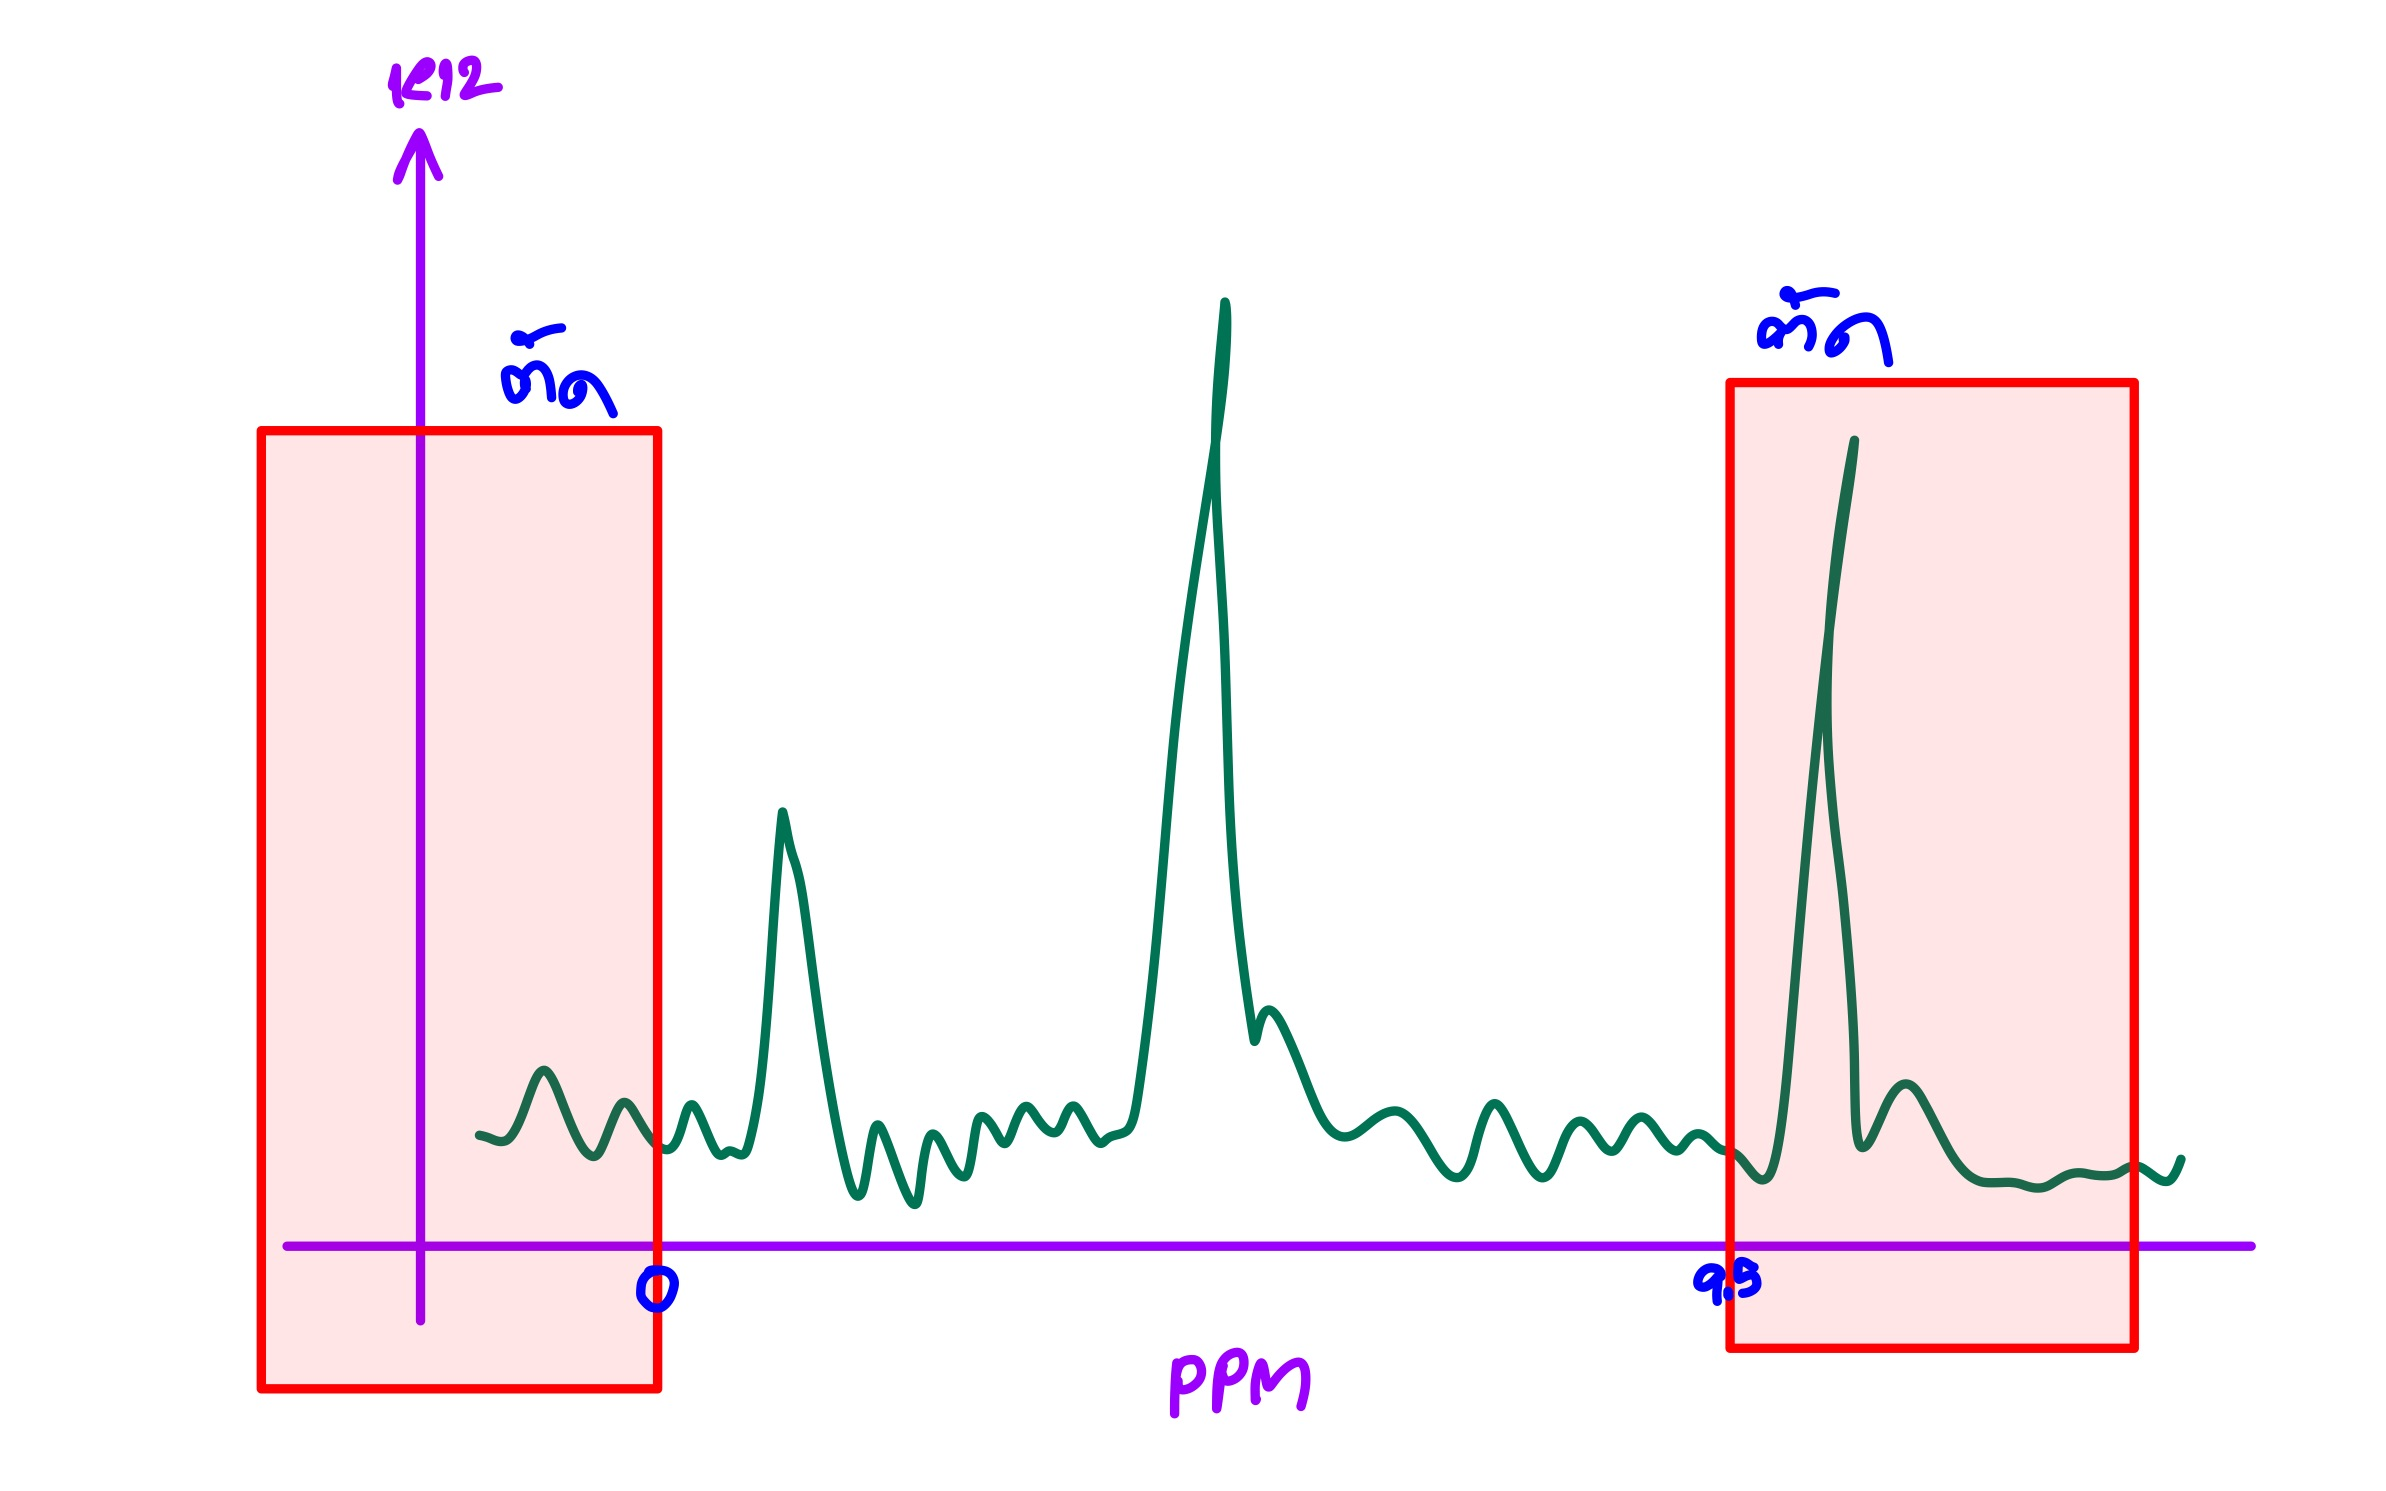

ขนาดของ ppm หลังกรอง: 51318
ขนาดของ X หลังกรอง: (51, 51318)


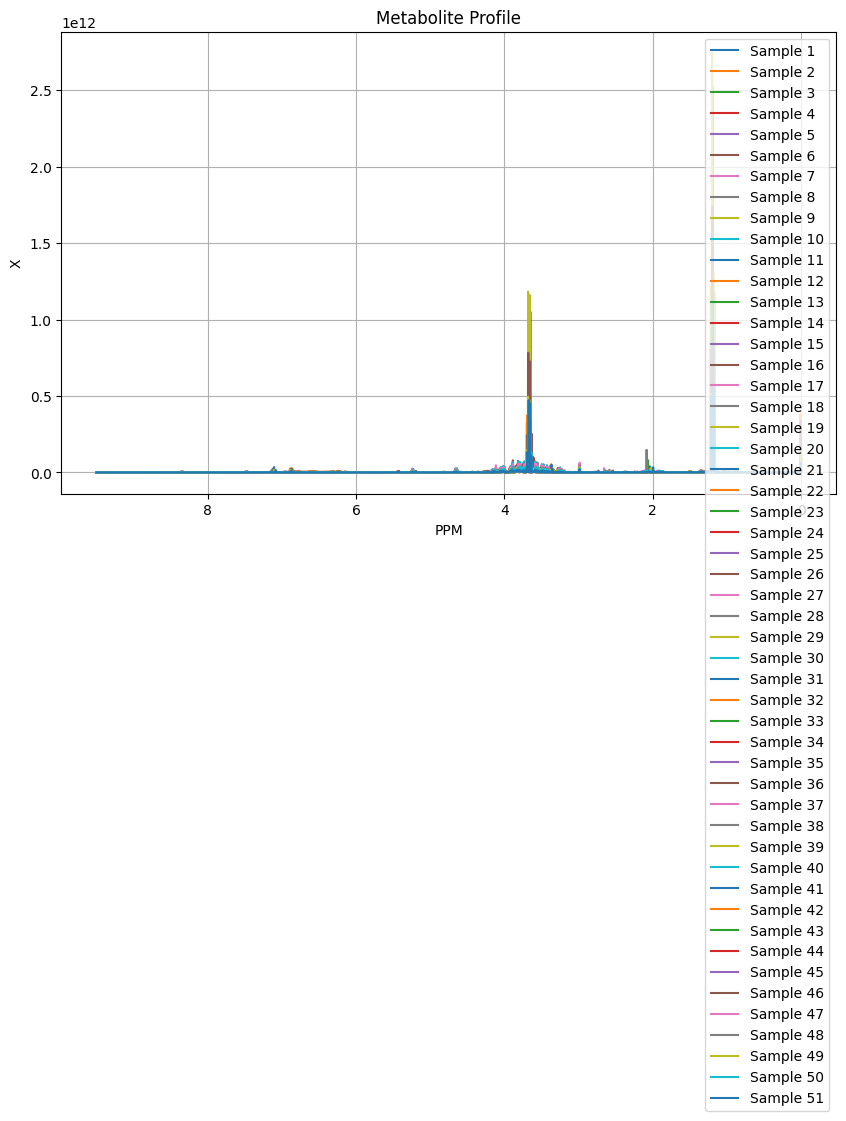

In [8]:
# สร้าง mask สำหรับกรองค่า ppm ที่อยู่ในช่วง (0, 9.5)
mask = (ppm > 0) & (ppm < 9.5)

# ใช้ mask กรองค่า ppm และ X
filtered_ppm = ppm[mask]  # กรองค่า ppm เฉพาะที่อยู่ในช่วงที่สนใจ
filtered_X = X[:, mask]    # กรองข้อมูล X ตามค่า ppm ที่เหลืออยู่

# ตรวจสอบขนาดของข้อมูลหลังการกรอง
print(f'ขนาดของ ppm หลังกรอง: {len(filtered_ppm)}')
print(f'ขนาดของ X หลังกรอง: {filtered_X.shape}')

# พล็อตกราฟสำหรับแต่ละ sample
plt.figure(figsize=(10, 6))
for i in range(filtered_X.shape[0]):  # วนลูปตามจำนวน samples
    plt.plot(filtered_ppm, filtered_X[i], label=f'Sample {i+1}')

plt.xlabel('PPM')
plt.ylabel('X')
plt.title('Metabolite Profile')
plt.legend()  # แสดง legend
plt.grid(True)  # แสดงตาราง grid
plt.gca().invert_xaxis()  # แกน ppm จากมากไปน้อย (แบบที่นิยมใช้ใน NMR)
plt.show()



และ 2 quantize ข้อมูลโดยลดจำนวนข้อมูล ให้เหลือเพียง 51 x 400 โดยรวมข้อมูลที่อยู่ข้างกันและเลือกค่า max X
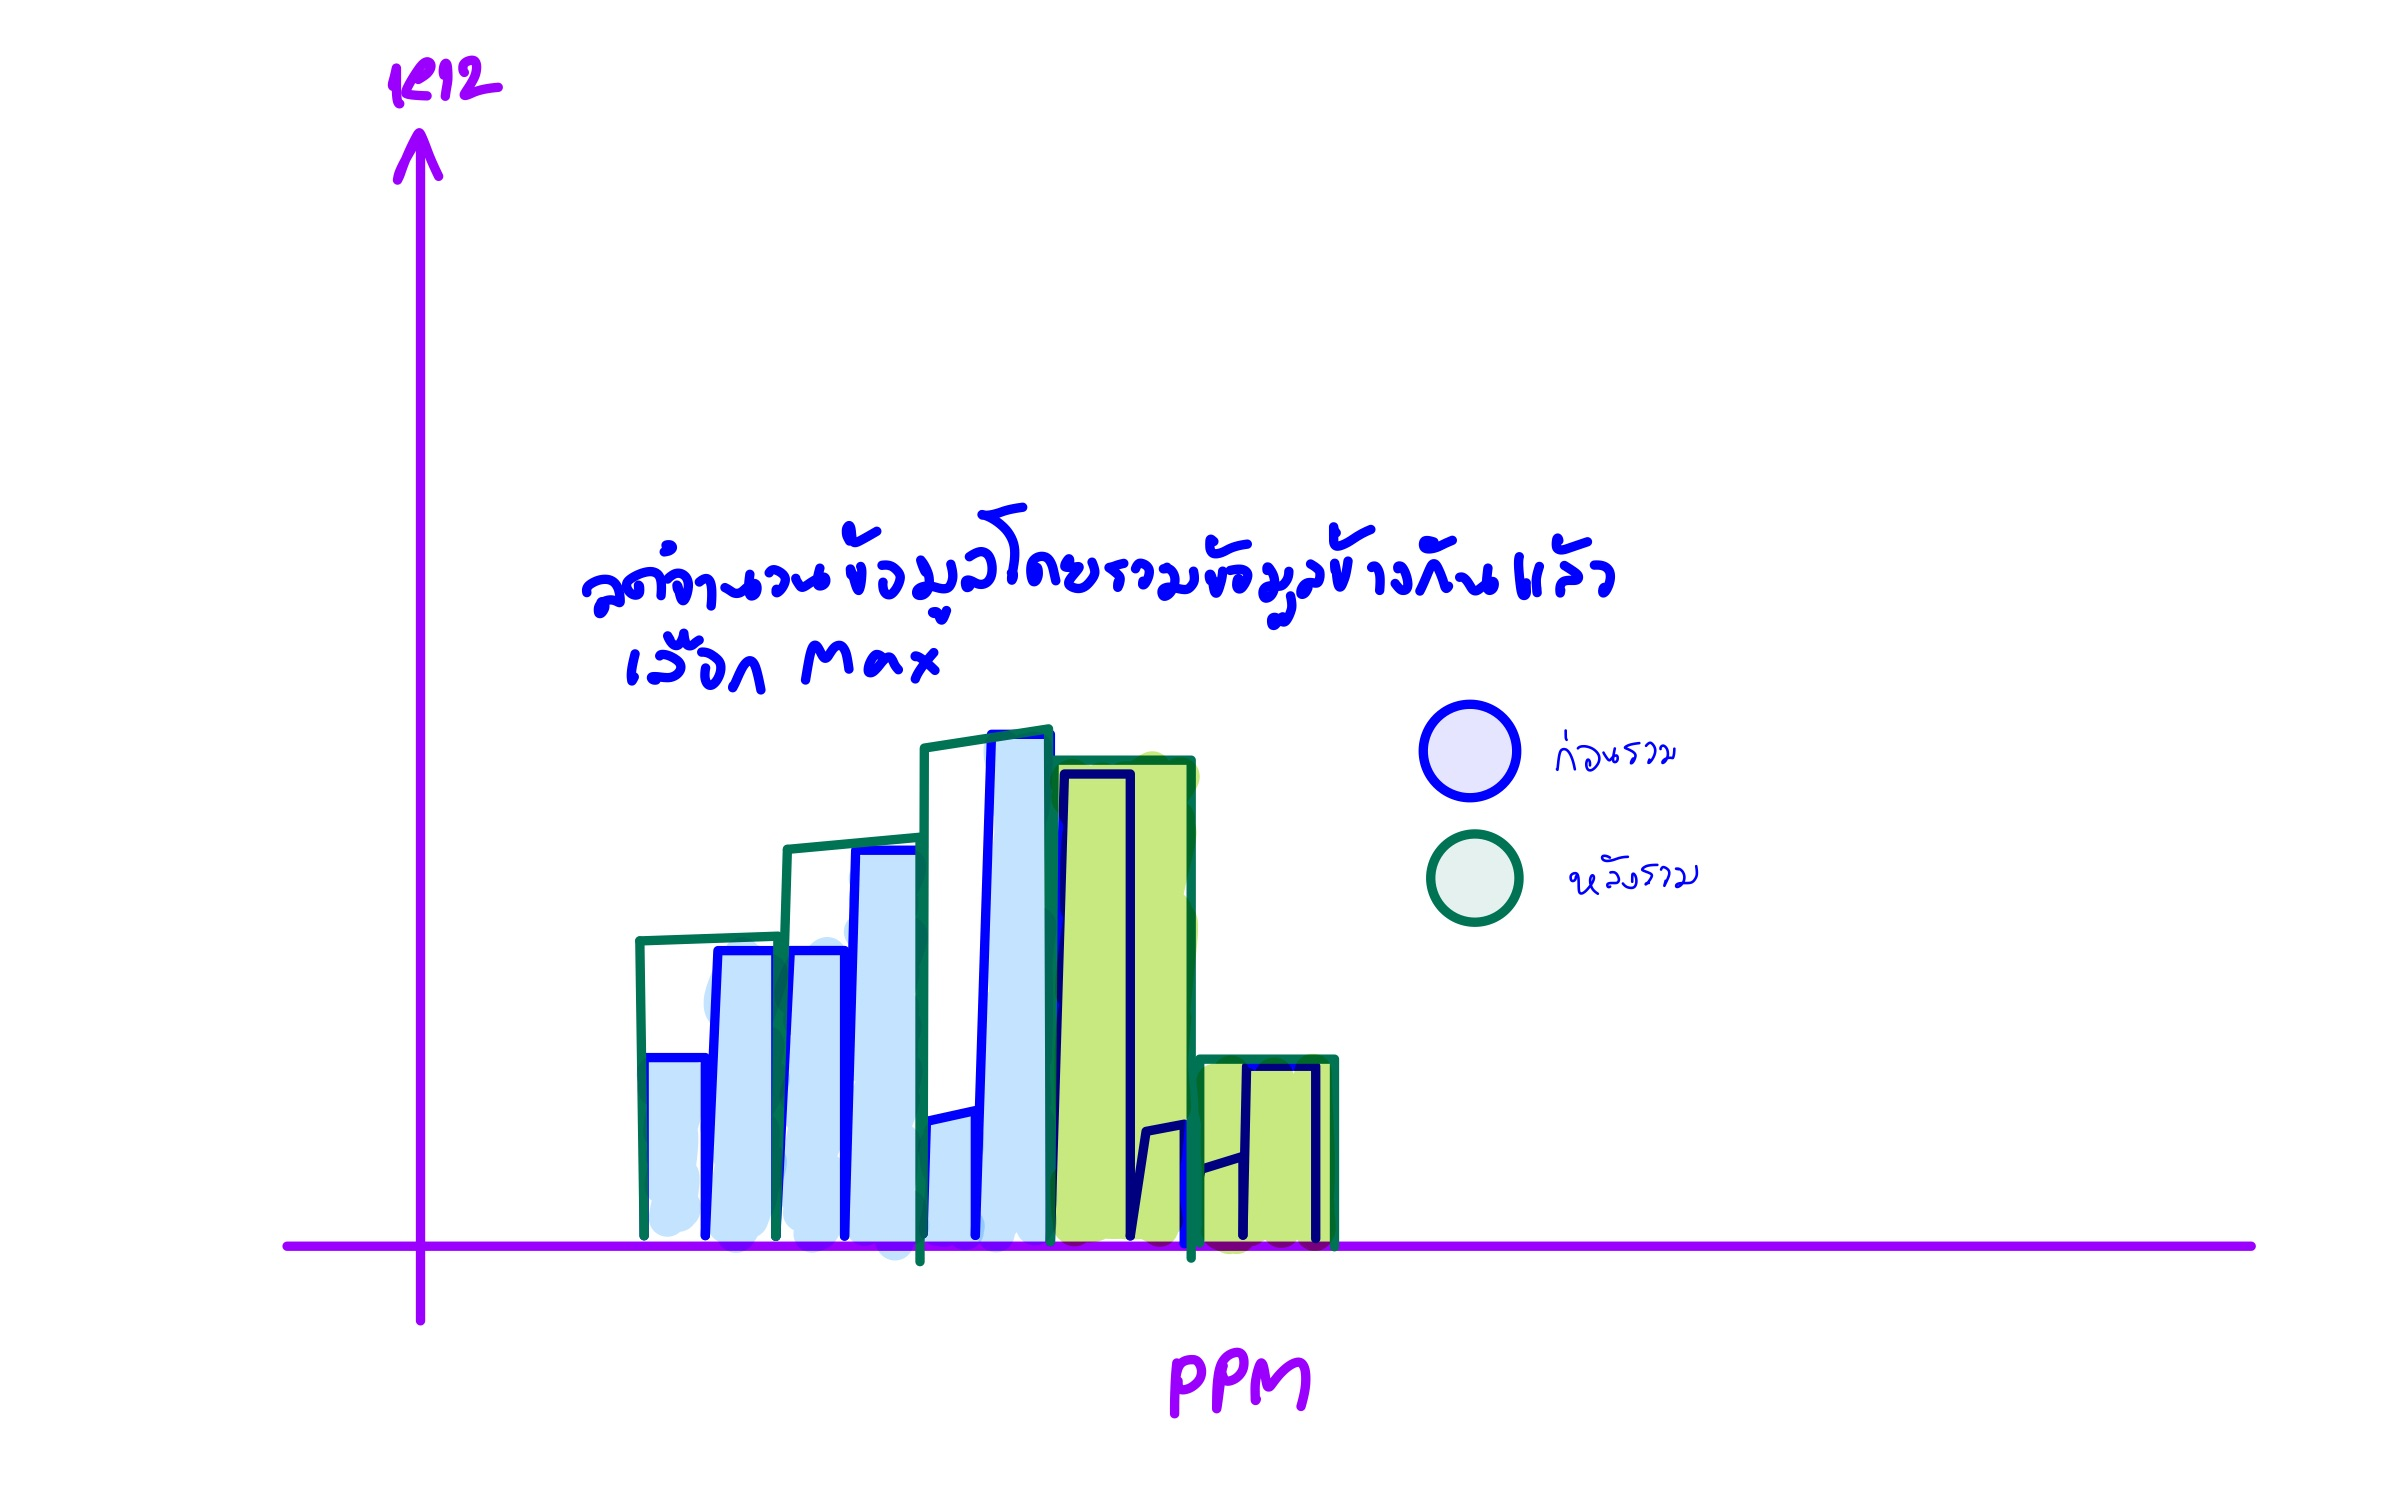

In [20]:
# จำนวน bins ที่ต้องการ (ลดขนาดจาก 65536 เป็น 400)
target_size = 400
bin_size = filtered_X.shape[1] // target_size  # ขนาดของแต่ละ bin

# สร้างข้อมูลใหม่ที่ย่อเหลือ 51x400
quantized_X = np.zeros((filtered_X.shape[0], target_size))  # เตรียม array สำหรับเก็บข้อมูล quantized

# วนลูปสำหรับแต่ละ sample
for i in range(filtered_X.shape[0]):
    # วนลูปสำหรับแต่ละ bin
    for j in range(target_size):
        start_index = j * bin_size
        end_index = start_index + bin_size
        # เลือกค่า max จากข้อมูลในแต่ละ bin
        quantized_X[i, j] = np.max(filtered_X[i, start_index:end_index])

# ตรวจสอบขนาดของข้อมูลหลังการ quantize
print(f'ขนาดของ X หลัง quantize: {quantized_X.shape}')


ขนาดของ X หลัง quantize: (51, 400)


ขนาดของ X หลัง quantize: (51, 400)


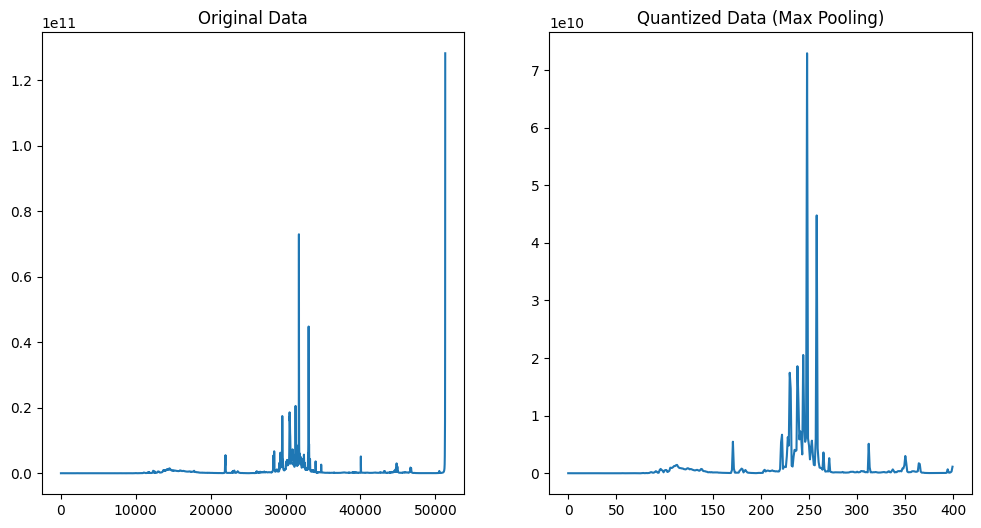

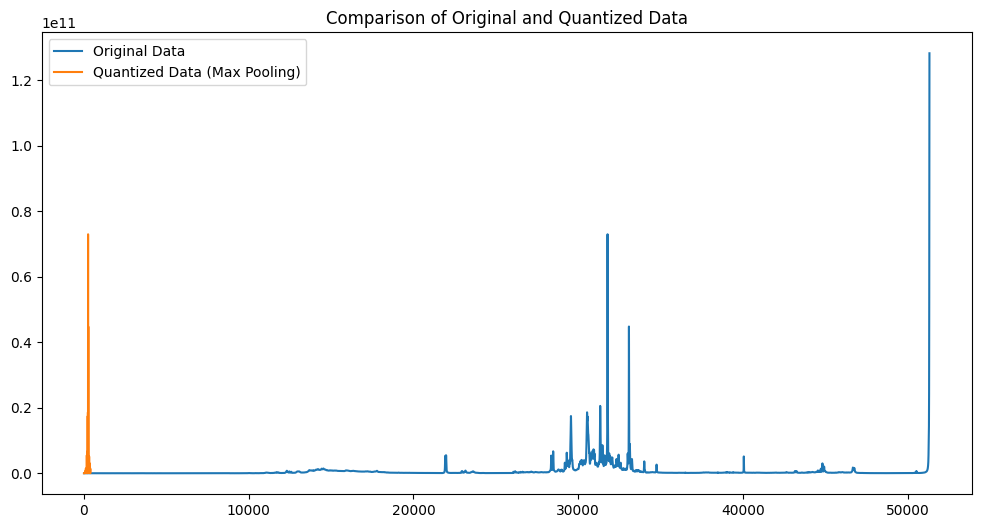

In [31]:
# prompt: รวมข้อมูลที่อยู่ข้างกันและเลือกค่า max X พร้อมสร้างกราฟแยกข้อมูลที่เคยรวมกับหลังรวม และสร้างกราฟที่รวมสองกราฟข้อมูลเก่ากับใหม่

import numpy as np
import pandas as pd
import pickle
from google.colab import drive
import matplotlib.pyplot as plt

# สมมติว่า filtered_X มีข้อมูลอยู่แล้ว
# filtered_X = ...

# จำนวน bins ที่ต้องการ (ลดขนาดจาก 65536 เป็น 400)
target_size = 400
bin_size = filtered_X.shape[1] // target_size  # ขนาดของแต่ละ bin

# สร้างข้อมูลใหม่ที่ย่อเหลือ 51x400
quantized_X = np.zeros((filtered_X.shape[0], target_size))  # เตรียม array สำหรับเก็บข้อมูล quantized

# วนลูปสำหรับแต่ละ sample
for i in range(filtered_X.shape[0]):
    # วนลูปสำหรับแต่ละ bin
    for j in range(target_size):
        start_index = j * bin_size
        end_index = start_index + bin_size
        # เลือกค่า max จากข้อมูลในแต่ละ bin
        quantized_X[i, j] = np.max(filtered_X[i, start_index:end_index])

# ตรวจสอบขนาดของข้อมูลหลังการ quantize
print(f'ขนาดของ X หลัง quantize: {quantized_X.shape}')

# สร้างกราฟแยกข้อมูลที่เคยรวมกับหลังรวม
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(filtered_X[0, :])
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.plot(quantized_X[0, :])
plt.title('Quantized Data (Max Pooling)')

plt.show()

# สร้างกราฟที่รวมสองกราฟข้อมูลเก่ากับใหม่
plt.figure(figsize=(12, 6))
plt.plot(filtered_X[0, :], label='Original Data')
plt.plot(quantized_X[0, :], label='Quantized Data (Max Pooling)')
plt.title('Comparison of Original and Quantized Data')
plt.legend()
plt.show()

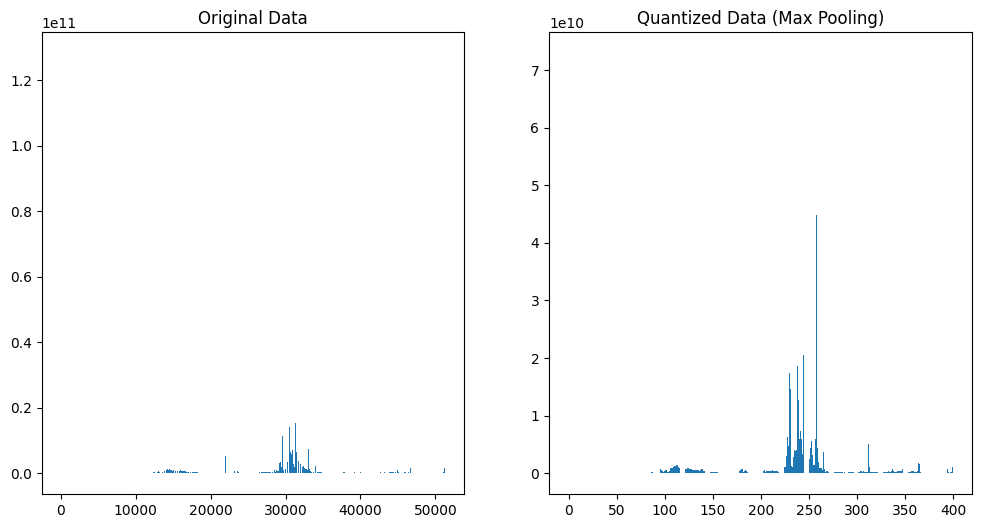

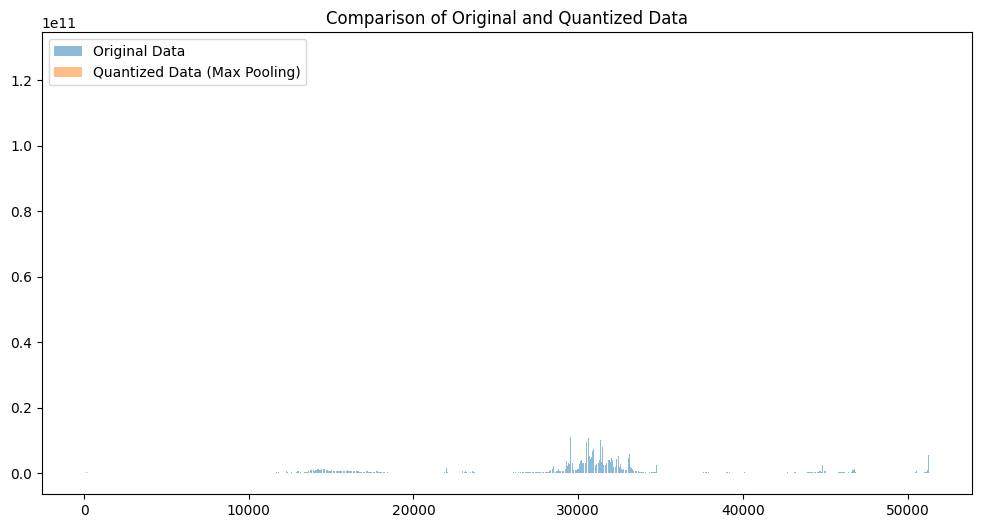

In [33]:
# prompt: ทำกราฟก่อนหน้านี้ทั้งสามกราฟเป็นกราฟแท่ง

# สร้างกราฟแท่งแยกข้อมูลที่เคยรวมกับหลังรวม
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(range(filtered_X.shape[1]), filtered_X[0, :])  # ใช้ bar แทน plot
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.bar(range(quantized_X.shape[1]), quantized_X[0, :])  # ใช้ bar แทน plot
plt.title('Quantized Data (Max Pooling)')

plt.show()

# สร้างกราฟแท่งที่รวมสองกราฟข้อมูลเก่ากับใหม่
plt.figure(figsize=(12, 6))
plt.bar(range(filtered_X.shape[1]), filtered_X[0, :], label='Original Data', alpha=0.5)  # ใช้ bar แทน plot และเพิ่ม alpha เพื่อความโปร่งใส
plt.bar(range(quantized_X.shape[1]), quantized_X[0, :], label='Quantized Data (Max Pooling)', alpha=0.5)  # ใช้ bar แทน plot และเพิ่ม alpha เพื่อความโปร่งใส
plt.title('Comparison of Original and Quantized Data')
plt.legend()
plt.show()

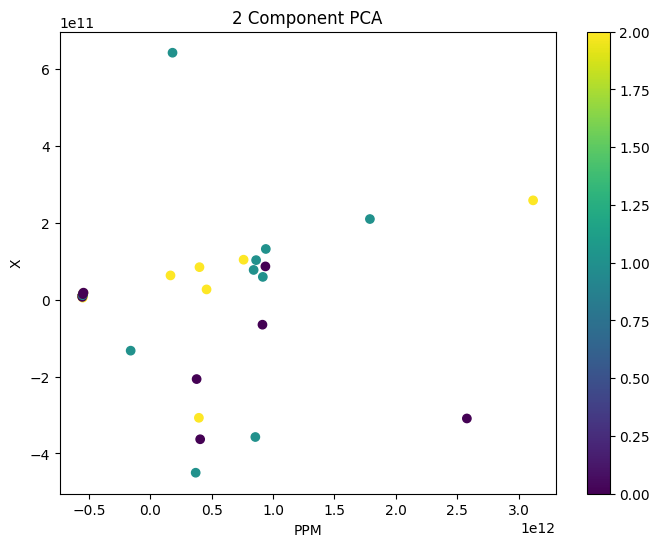

Explained variance ratio: [0.94383973 0.03409958]


In [38]:
# prompt: ทำ PCA ข้อมูลเพื่อให้สามารถ visualize ได้

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np # Import numpy for generating sample data

# Assuming quantized_X is defined elsewhere
# If not, please define quantized_X before proceeding
# quantized_X = ...

# Generating sample y data for demonstration purposes
# Replace with actual y if available
# Example: y = np.random.randint(0, 3, quantized_X.shape[0])
# This will create random integers between 0 and 2 for the length of quantized_X
y = np.random.randint(0, 3, quantized_X.shape[0])

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(quantized_X)

# Create a DataFrame for visualization
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, pd.DataFrame(y)], axis=1) # y is now defined and should work

# Visualize the data using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(finalDf['principal component 1'], finalDf['principal component 2'], c=y, cmap='viridis')
plt.xlabel('PPM')
plt.ylabel('X')
plt.title('2 Component PCA')
plt.colorbar()
plt.show()

# Explained variance ratio
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

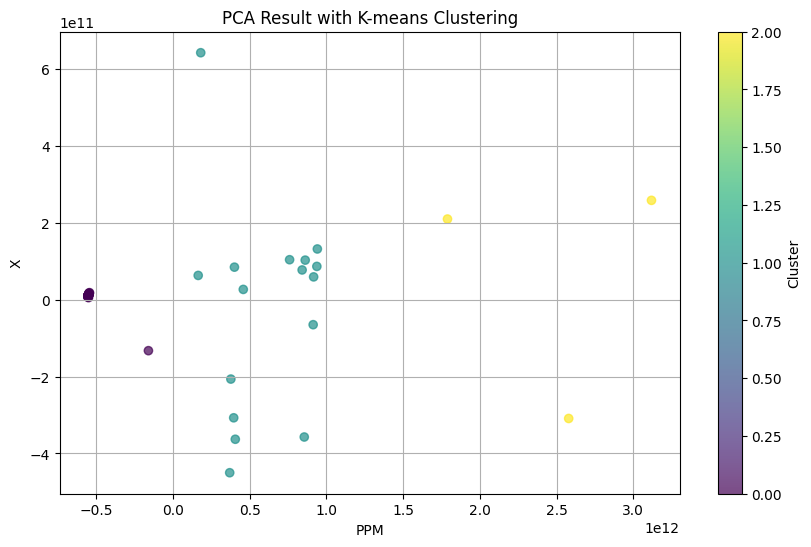

Explained variance ratio: [0.94383973 0.03409958]


In [40]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

#นำเสนอ PCA ที่ทำ quantized_X ให้มีขนาด 51 x 400
# Generating sample y data for demonstration purposes
# Replace with actual y if available
y = np.random.randint(0, 3, quantized_X.shape[0])

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(quantized_X)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3)  # กำหนดจำนวนกลุ่มที่ต้องการ
kmeans.fit(principalComponents)
clusters = kmeans.labels_  # ได้ค่ากลุ่มสำหรับแต่ละจุดข้อมูล

# Create a DataFrame for visualization
principalDf = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])
finalDf = pd.concat([principalDf, pd.DataFrame(clusters, columns=['Cluster'])], axis=1)

# Visualize the data using a scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(finalDf['Principal Component 1'], finalDf['Principal Component 2'], c=finalDf['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('PPM')
plt.ylabel('X')
plt.title('PCA Result with K-means Clustering')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

# Explained variance ratio
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

#**อธิบาย**
**0.94383973 คือ คอมโพเนนต์หลักที่ 1 (PPM ) อธิบายความแปรปรวนของข้อมูลประมาณ 94.38% ซึ่งแสดงให้เห็นว่าคอมโพเนนต์นี้มีความสำคัญสูงในการอธิบายลักษณะของข้อมูล และ 0.03409958 คือ คอมโพเนนต์หลักที่ 2 (X) อธิบายความแปรปรวนของข้อมูลประมาณ 3.41% ซึ่งมีความสำคัญน้อยกว่าเมื่อเปรียบเทียบกับคอมโพเนนต์หลักที่ 1 สรุป คือ ข้อมูลถูกลดมิติด้วย PCA โดยคอมโพเนนต์หลักที่ 1 มีความสามารถในการอธิบายความแปรปรวนในข้อมูลได้มากที่สุด ในขณะที่คอมโพเนนต์หลักที่ 2 มีบทบาทน้อยลงในการอธิบายลักษณะของข้อมูล**

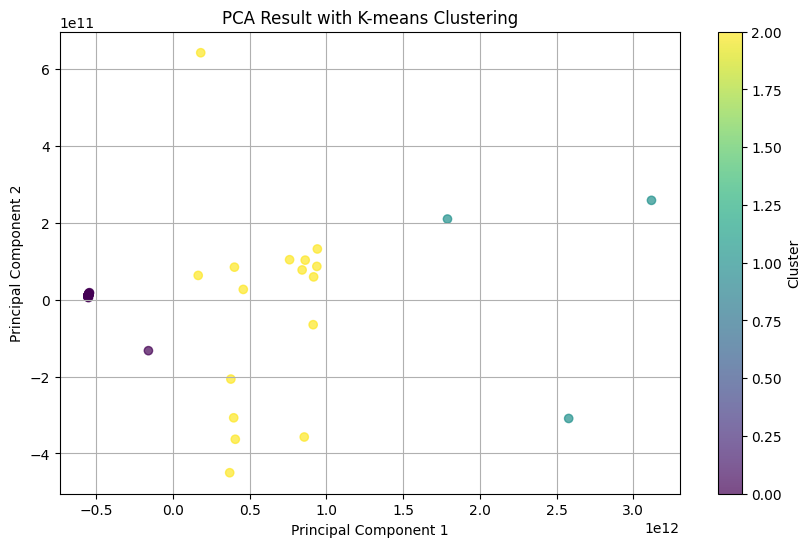

There are 3 groups in the data from PCA.

Table showing the cluster assignment for each data point:
    Principal Component 1  Principal Component 2  Cluster
0           -5.510320e+11           1.114919e+10        0
1           -5.503732e+11           1.218689e+10        0
2           -5.521917e+11           1.083279e+10        0
3           -5.526674e+11           1.056511e+10        0
4           -5.467747e+11           1.529962e+10        0
5           -5.496501e+11           1.601124e+10        0
6           -5.522665e+11           1.093775e+10        0
7           -5.514448e+11           1.050829e+10        0
8           -5.513530e+11           1.111623e+10        0
9           -5.523058e+11           1.137820e+10        0
10          -5.508866e+11           1.200393e+10        0
11          -5.529553e+11           1.055349e+10        0
12          -5.525016e+11           1.143788e+10        0
13          -5.459642e+11           1.703659e+10        0
14          -5.519831e+11     

In [41]:
# prompt: ตอบคำถามว่า data จาก PCA มีทั้งหมดกี่กลุ่ม โดย plot จุดข้อมูลแต่ละกลุ่มเป็นคนละสี
# สร้าง ตารางที่มี column บอกว่า data แต่ละจุดนั้นอยู่กลุ่มไหน

# Assuming quantized_X and y are defined elsewhere
# If not, please define quantized_X before proceeding
# quantized_X = ...

# Generating sample y data for demonstration purposes
# Replace with actual y if available
# Example: y = np.random.randint(0, 3, quantized_X.shape[0])
# This will create random integers between 0 and 2 for the length of quantized_X
#y = np.random.randint(0, 3, quantized_X.shape[0])

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(quantized_X)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3)  # กำหนดจำนวนกลุ่มที่ต้องการ
kmeans.fit(principalComponents)
clusters = kmeans.labels_  # ได้ค่ากลุ่มสำหรับแต่ละจุดข้อมูล

# Create a DataFrame for visualization
principalDf = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])
finalDf = pd.concat([principalDf, pd.DataFrame(clusters, columns=['Cluster'])], axis=1)

# Visualize the data using a scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(finalDf['Principal Component 1'], finalDf['Principal Component 2'], c=finalDf['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result with K-means Clustering')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

# Print the number of groups
num_groups = len(np.unique(clusters))
print(f"There are {num_groups} groups in the data from PCA.")

# Display the table showing which group each data point belongs to
print("\nTable showing the cluster assignment for each data point:")
print(finalDf)

#**มี 3 กลุ่มในข้อมูลจาก PCA**

**การจัดกลุ่มสำหรับแต่ละจุดข้อมูล ตาม (Cluster) 0, 1, 2
แสดงรายละเอียดข้อมูลเป็น table showing ข้างบน**

ข้อสอบ
0. preprocess ข้อมูลตามคำแนะนำข้างบน
1. ทำ PCA ข้อมูลเพื่อให้สามารถ visualize ได้
2. visualize ข้อมูลทั้ง 51 จุด เพื่อดูการจัดกลุ่มของข้อมูลเบื้องต้น
3. ตอบคำถามว่า data มีทั้งหมดกี่กลุ่ม โดย plot จุดข้อมูลแต่ละกลุ่มเป็นคนละสี
4. สร้าง ตารางที่มี column บอกว่า data แต่ละจุดนั้นอยู่กลุ่มไหน